In [221]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
import matplotlib.pylab as plt

import plotly.express as px
from plotly.offline import iplot , plot
from plotly.subplots import make_subplots
import re
import seaborn as sns

from sklearn import linear_model, tree

In [222]:
from google.colab import drive
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spotify2023.csv', encoding='latin-1')

In [223]:
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [147]:
df.shape

(953, 24)

In [148]:
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [149]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [224]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [151]:
df.isnull().sum().sum()

145

In [152]:
df2 = df
df2 = df2.fillna(0)

In [153]:
df2.isnull().sum().sum()

0

In [154]:
df = df.fillna(0)

In [155]:
df.isnull().sum().sum()

0

In [156]:
df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [157]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
948    False
949    False
950    False
951    False
952    False
Length: 953, dtype: bool

In [158]:
df = df.drop_duplicates()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fda5b67c8b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fda5b67d0c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fda59b833d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fda5b67ee30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fda5b67f970>],
 'means': []}

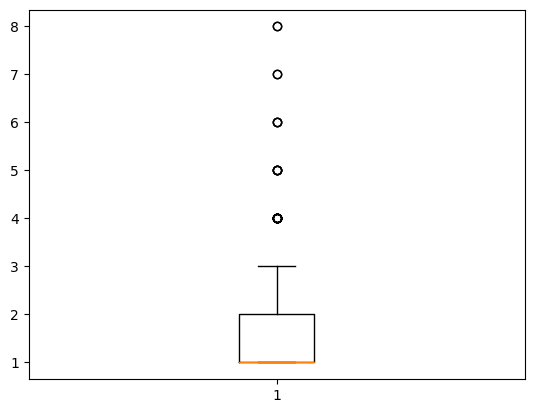

In [159]:
plt.boxplot(df.artist_count)

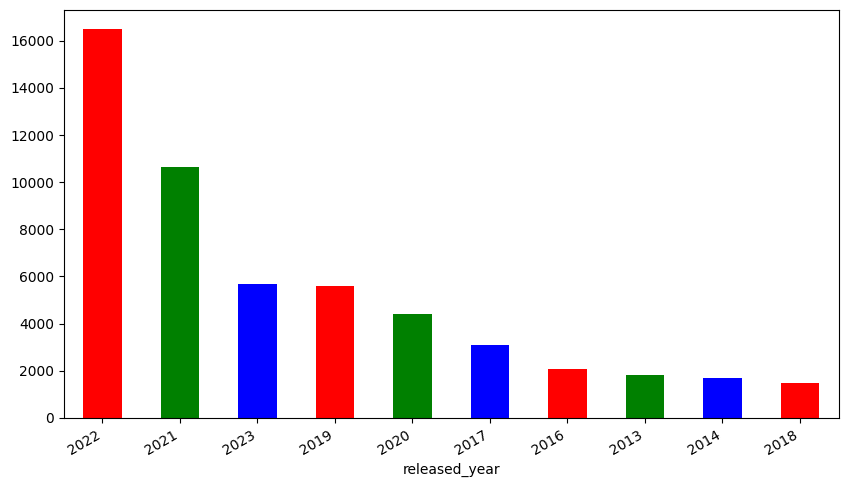

In [160]:
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('released_year')['in_apple_playlists'].sum().sort_values(ascending=False).head(10).plot(kind='bar', color=['r', 'g', 'b'])
f.autofmt_xdate()
plt.show()

In [161]:
d = {'released_year':'year','released_month':'month','released_day':'day'}

df['datetime'] = pd.to_datetime(df.rename(columns=d)[list(d.values())])

In [162]:
print(f"Number of column :{df.shape[1]}\nNumber of rows :{df.shape[0]}")

Number of column :25
Number of rows :953


In [163]:
artist_counts = df['artist(s)_name'].value_counts()

In [164]:
artist_counts

Taylor Swift                 34
The Weeknd                   22
Bad Bunny                    19
SZA                          19
Harry Styles                 17
                             ..
Karol G, Ovy On The Drums     1
Coolio, L.V.                  1
Kordhell                      1
Kenia OS                      1
Feid, Sech, Jhayco            1
Name: artist(s)_name, Length: 645, dtype: int64

In [165]:
df['artist_counts'] = df['artist(s)_name'].value_counts()

In [166]:
df["artist_counts"]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
948   NaN
949   NaN
950   NaN
951   NaN
952   NaN
Name: artist_counts, Length: 953, dtype: float64

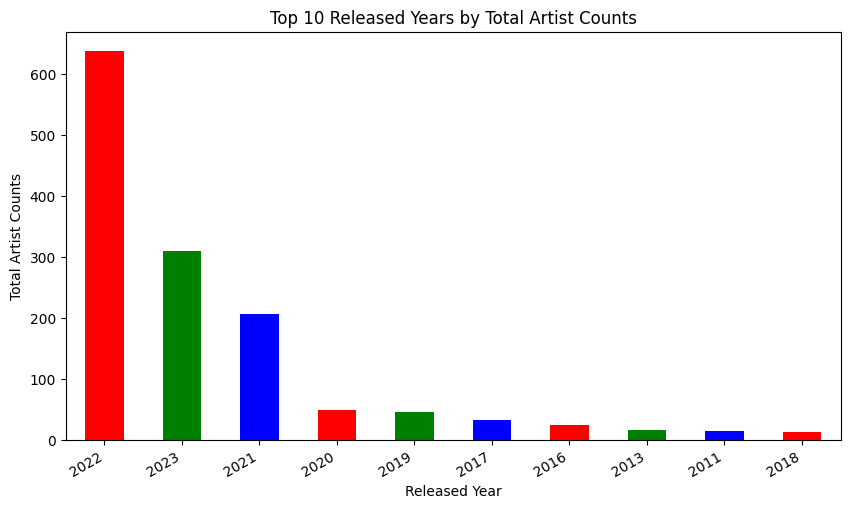

In [209]:
f, ax = plt.subplots(figsize=(10, 6))

df.groupby('released_year')['artist_count'].sum().sort_values(ascending=False).head(10).plot(kind='bar', color=['r', 'g', 'b'])

f.autofmt_xdate()
plt.xlabel('Released Year')
plt.ylabel('Total Artist Counts')
plt.title('Top 10 Released Years by Total Artist Counts')
plt.show()

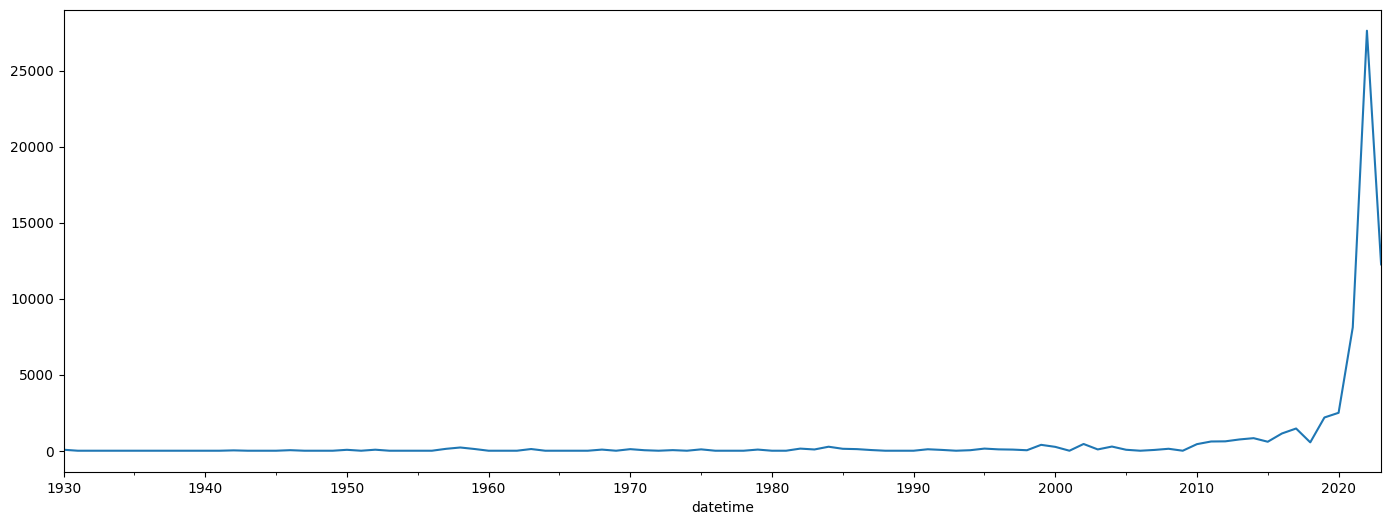

In [168]:
f, ax = plt.subplots(figsize=(17, 6))
df.resample('Y', on='datetime')['danceability_%'].sum().plot()
plt.show()

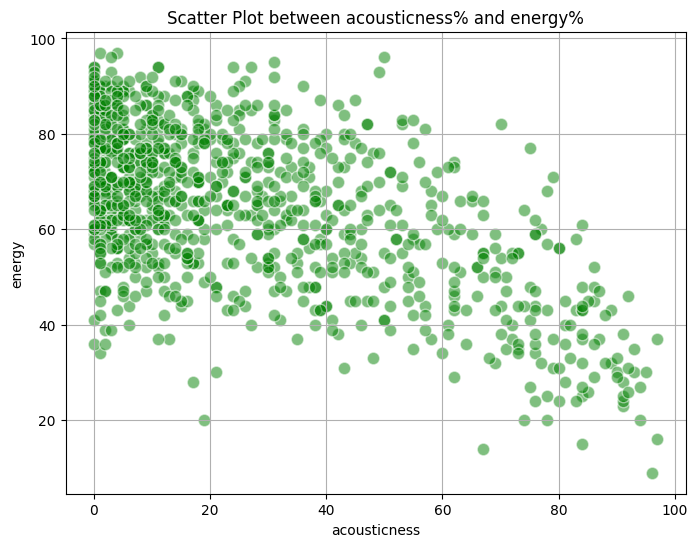

In [170]:
plt.figure(figsize=(8, 6))

plt.scatter(df['acousticness_%'], df['energy_%'], color='green' , alpha=0.5, edgecolors='w', s=80)
plt.title('Scatter Plot between acousticness% and energy%')
plt.xlabel('acousticness')
plt.ylabel('energy')
plt.grid(True)
plt.show()

<ipython-input-171-3507a8759112>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




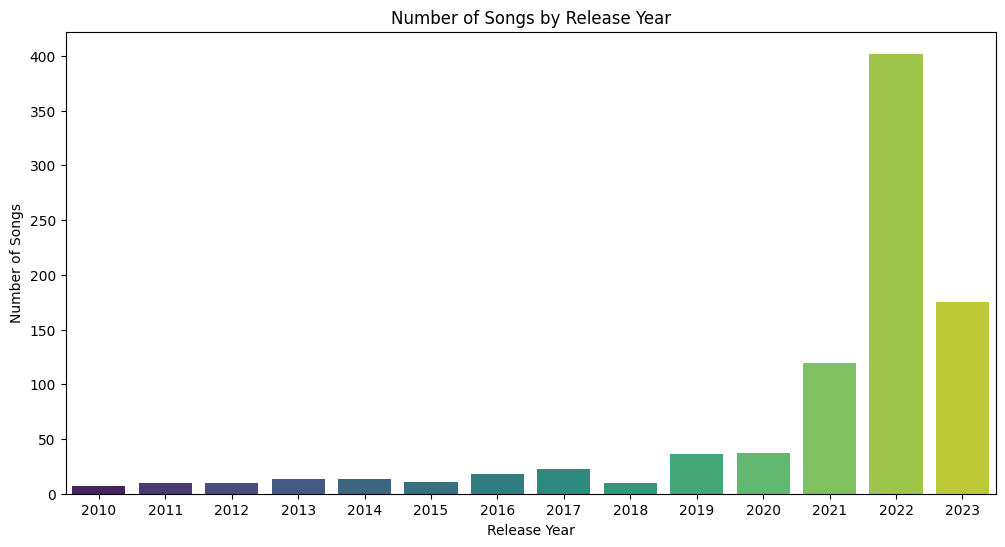

In [171]:
songs_by_year = df['released_year'].value_counts().reset_index()
songs_by_year.columns = ['released_year', 'count']
plt.figure(figsize=(12, 6))
sns.barplot(x='released_year', y='count', data=songs_by_year.head(14), palette='viridis')
plt.title('Number of Songs by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Songs')
plt.show()

In [174]:
artist_appearances = df.groupby('artist(s)_name')['in_apple_charts'].sum().reset_index()

print(artist_appearances)

                                    artist(s)_name  in_apple_charts
0                                         (G)I-DLE              242
1                                 21 Savage, Gunna                0
2                              24kgoldn, Iann Dior               27
3                                          50 Cent              106
4                 A$AP Rocky, Metro Boomin, Roisee               60
..                                             ...              ...
640                                         j-hope               52
641                                j-hope, J. Cole               82
642                                   sped up 8282                0
643  sped up nightcore, ARIZONATEARS, Lil Uzi Vert                0
644                                           teto                2

[645 rows x 2 columns]


In [176]:
artist_appearances = artist_appearances.sort_values(by='in_apple_charts', ascending=False)

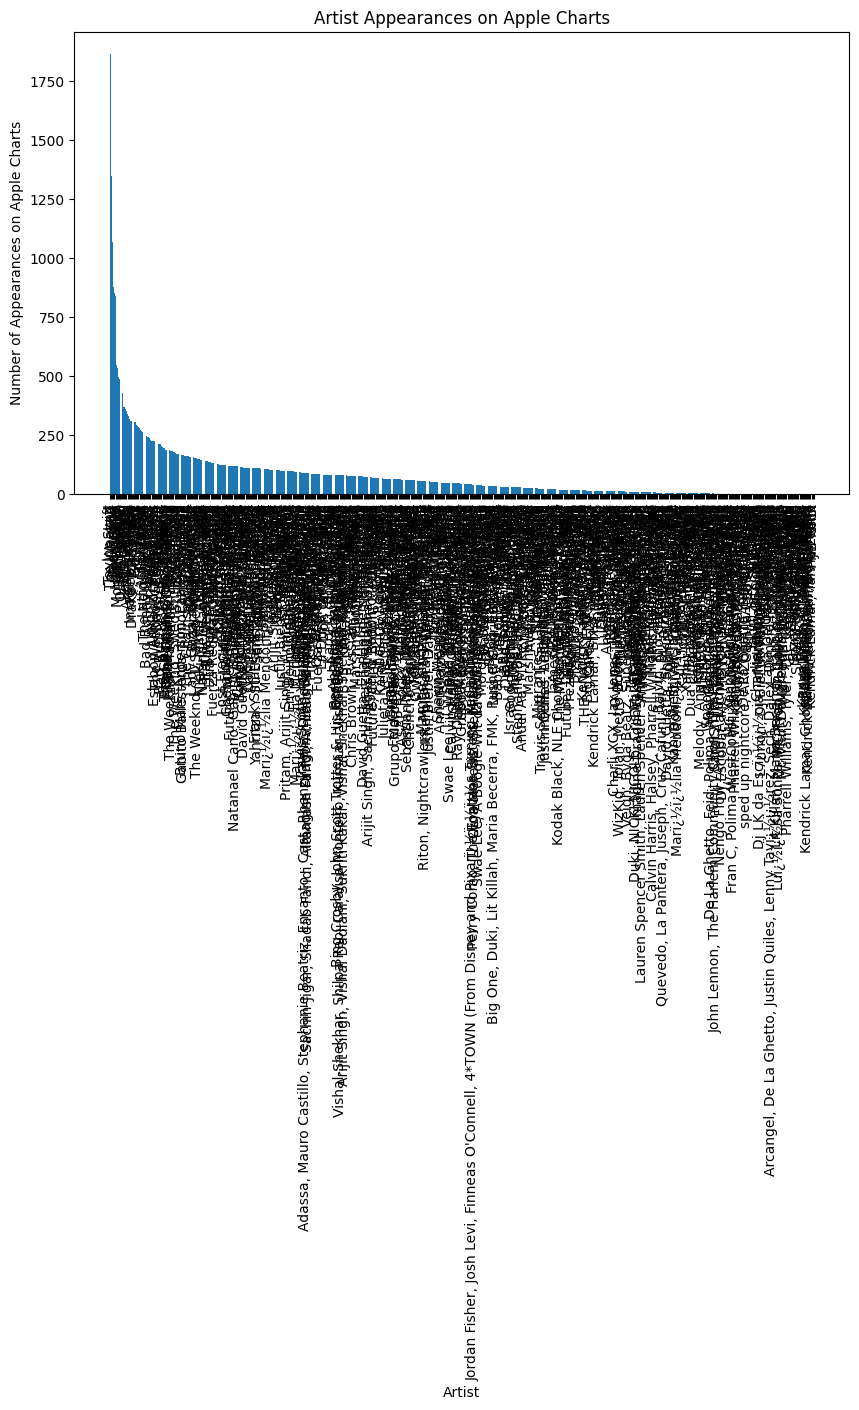

In [179]:
artist_appearances = df.groupby('artist(s)_name')['in_apple_charts'].sum().reset_index()

artist_appearances = artist_appearances.sort_values(by='in_apple_charts', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(artist_appearances['artist(s)_name'], artist_appearances['in_apple_charts'])
plt.xlabel('Artist')
plt.ylabel('Number of Appearances on Apple Charts')
plt.title('Artist Appearances on Apple Charts')
plt.xticks(rotation=90)
plt.show()

<ipython-input-208-ee52464a6961>:5: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



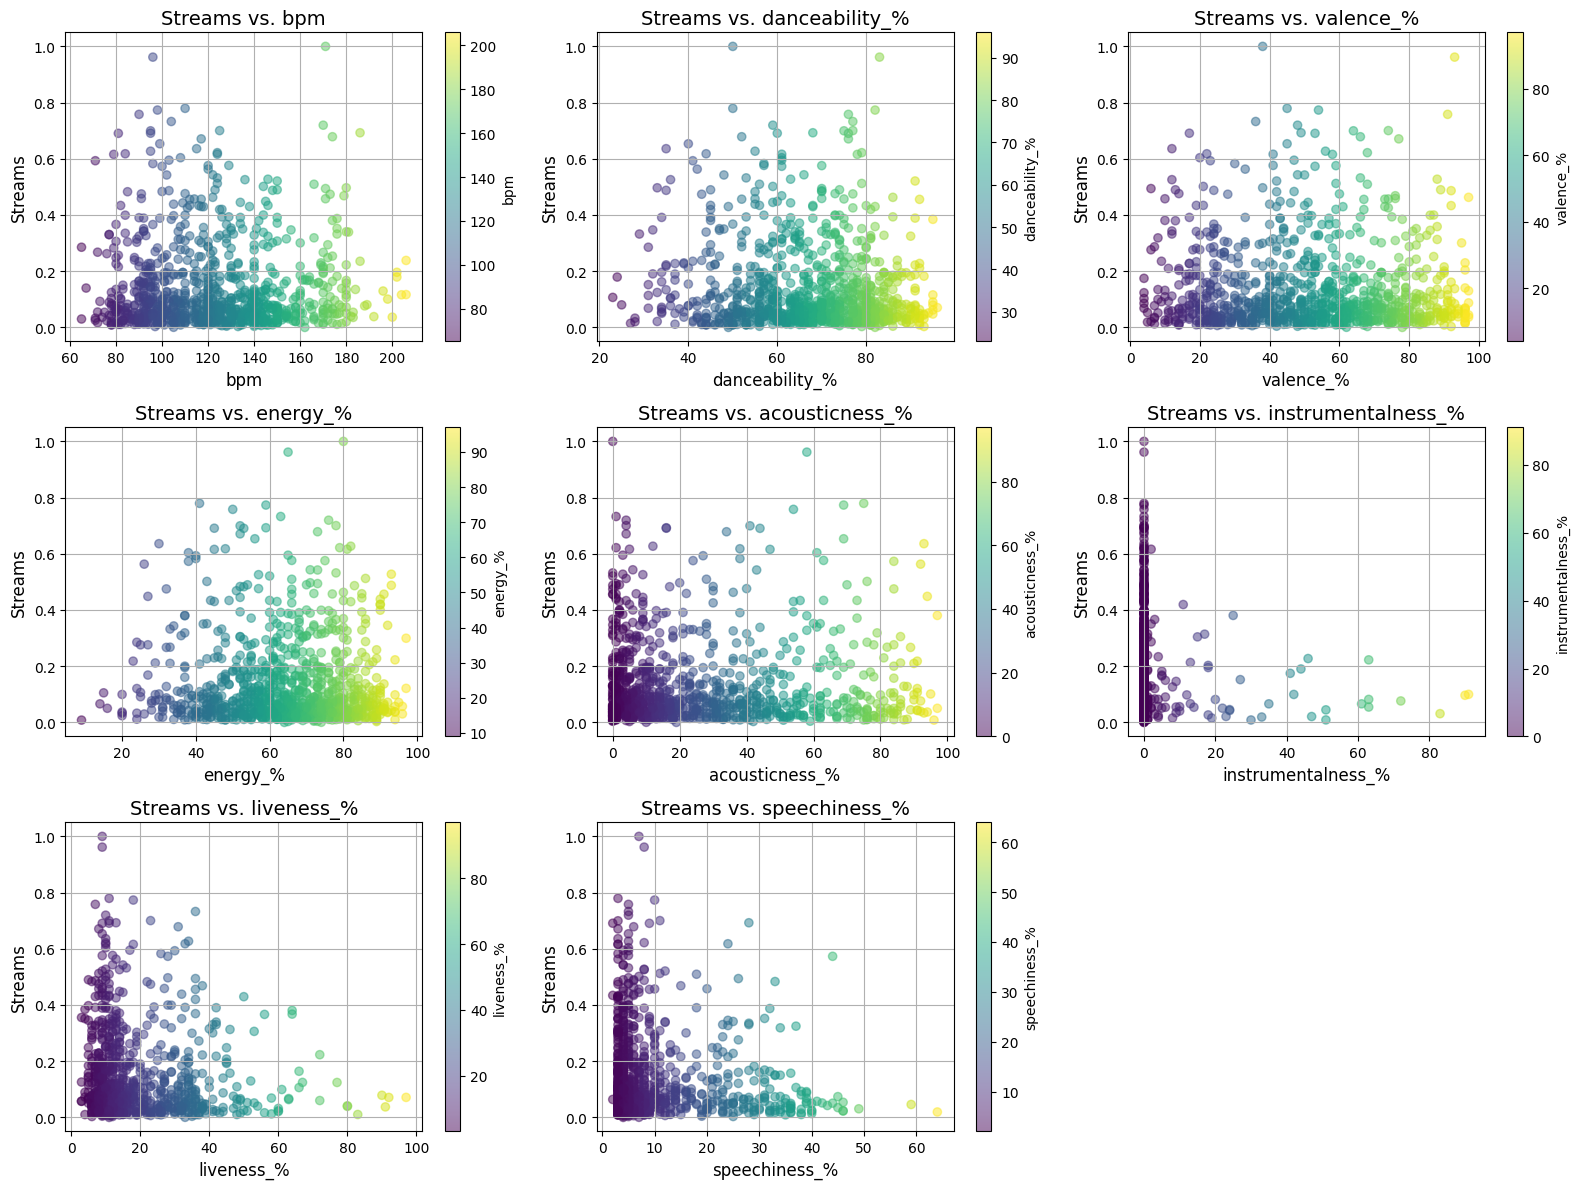

In [208]:
columns_to_plot = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()
colormap = plt.cm.get_cmap('viridis')

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])

    scatter = plt.scatter(df[column], df['streams'], c=df[column], cmap=colormap, alpha=0.5)

    plt.xlabel(column, fontsize=12)
    plt.ylabel('Streams', fontsize=12)
    plt.title(f'Streams vs. {column}', fontsize=14)
    plt.grid(True)
    plt.colorbar(scatter, label=column)

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



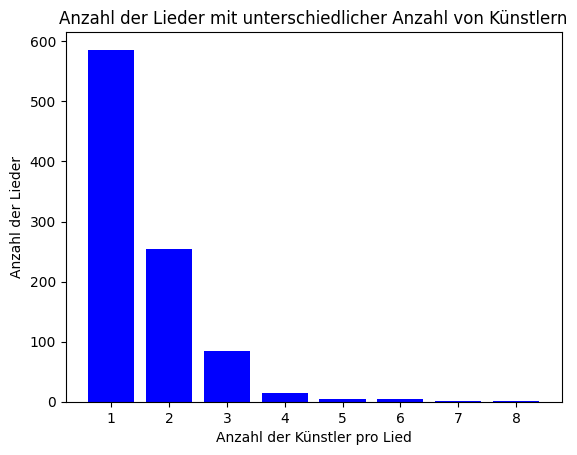

In [197]:
df['num_artists'] = df['artist(s)_name'].apply(lambda x: len(x.split(',')))

artist_counts = df['num_artists'].value_counts()

artist_counts = artist_counts.sort_index()

plt.bar(artist_counts.index, artist_counts.values, color='blue')
plt.xlabel('Anzahl der Künstler pro Lied')
plt.ylabel('Anzahl der Lieder')
plt.title('Anzahl der Lieder mit unterschiedlicher Anzahl von Künstlern')
plt.show()

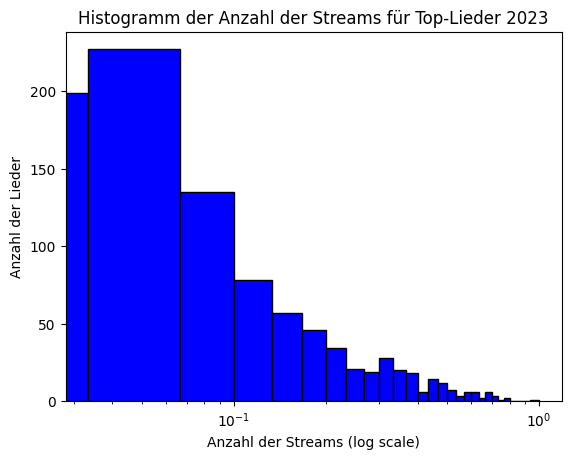

In [200]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

plt.hist(df['streams'], bins=30, color='blue', edgecolor='black')
plt.xscale('log')
plt.xlabel('Anzahl der Streams (log scale)')
plt.ylabel('Anzahl der Lieder')
plt.title('Histogramm der Anzahl der Streams für Top-Lieder 2023')
plt.show()



---


# **HYPOTHESE**

##### Wenn ein Lied auf einer Streaming-Platform beliebt ist, ist die Wahrscheinlichkeit höher das es auch auf anderen Streaming-Platformen beliebt ist.

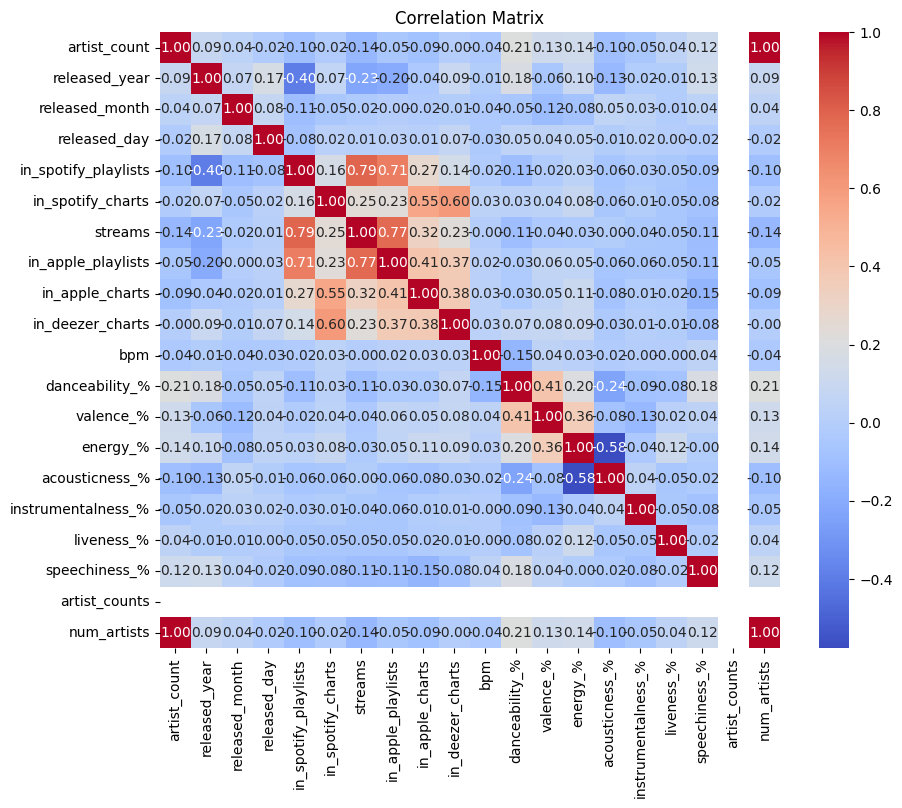

In [210]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



---


# **PLAUSIBEL ODER NICHT?**

##### In der Korrelations-Matrix steht bei der Kreuzung von "in_spotify_playlists" und "in_apple_playlists" der Wert "0.71".
#### Das bedeutet das die beiden auf einander einen Einfluss haben und das unsere Hypothese mit "Ja" beantwortet werden kann.



---

#**MODEL**

In [225]:
X = df.iloc[0:len(df),7] #spotify charts
Y = df.iloc[0:len(df),10] #apple charts

In [226]:
X

0      147
1       48
2      113
3      100
4       50
      ... 
948      0
949      0
950      0
951      0
952      2
Name: in_spotify_charts, Length: 953, dtype: int64

In [227]:
Y

0      263
1      126
2      207
3      207
4      133
      ... 
948     13
949      0
950      0
951     26
952     18
Name: in_apple_charts, Length: 953, dtype: int64

In [240]:
mask = (df['in_spotify_charts'] == 0) & (df['in_apple_charts'] == 0)

df = df[~mask]

df.tail()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
929,Bamba (feat. Aitch & BIA),"Luciano, Aitch, Bï¿½",3,2022,9,22,869,7,146223492,14,...,138,A#,Major,80,82,81,14,0,13,36
930,Casei Com a Putaria,"MC Ryan SP, Love Funk, Mc Paiva ZS",3,2022,7,1,648,4,187701588,0,...,161,A#,Minor,59,62,60,12,0,5,44
939,Spin Bout U,"Drake, 21 Savage",2,2022,11,4,1652,2,198365537,26,...,130,G,Major,77,20,70,1,0,16,5
944,The Astronaut,Jin,1,2022,10,28,481,9,203436468,10,...,125,F,Major,54,22,76,0,0,14,3
952,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,...,90,E,Minor,61,32,67,15,0,11,5


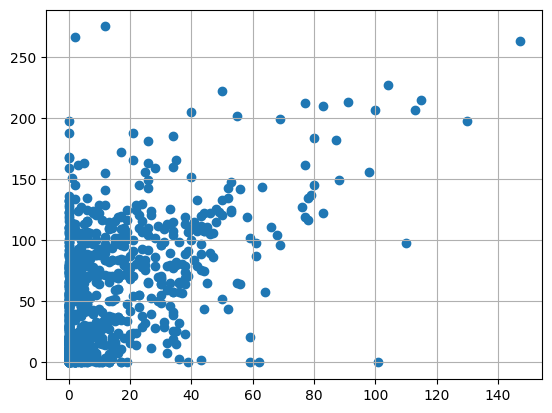

In [241]:
axes = plt.axes()
axes.grid()
plt.scatter(X,Y)
plt.show()

In [ ]:
x_test= ig
y_test = ig

x_train =
y_train =